This Notebook Implements K means algorithm on Iris dataset and see how K Means clustering clusters the data in 3 species and check how accurately it classify by graphical comparison. We also try to find best value of K to get best trained model.

***Importing all the necessary libraries.***

In [0]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [0]:
iris = datasets.load_iris() #loading data 

In [0]:
X = iris.data[:, :2] #Input features only Sepal leangth and width
y = iris.target # target feature 

In [30]:
iris.data.shape #checking shape of the data

(150, 4)

Creating a scatter plot between sepal lengtha and width and mapping the species in the graph.

Text(0, 0.5, 'Sepal Width')

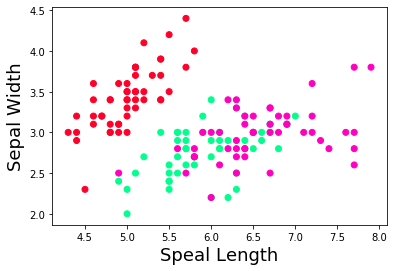

In [31]:

plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow') 
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

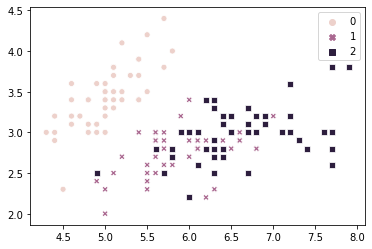

In [45]:
#created above graph using Seaborn
sns.scatterplot(X[:,0],X[:,1], hue=y,style=y) #

In [46]:
#Fitting the K means model
km = KMeans(n_clusters = 2, n_jobs = 4, random_state=17)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [47]:
centers = km.cluster_centers_ # checking Coordinates of cluster centers. 
print(centers)

[[5.22409639 3.1313253 ]
 [6.61044776 2.96567164]]


Plotting the real differnece between the scatter plot created in above cells and the Clusters created by Kmeans algorithm.

Text(0.5, 1.0, 'Predicted')

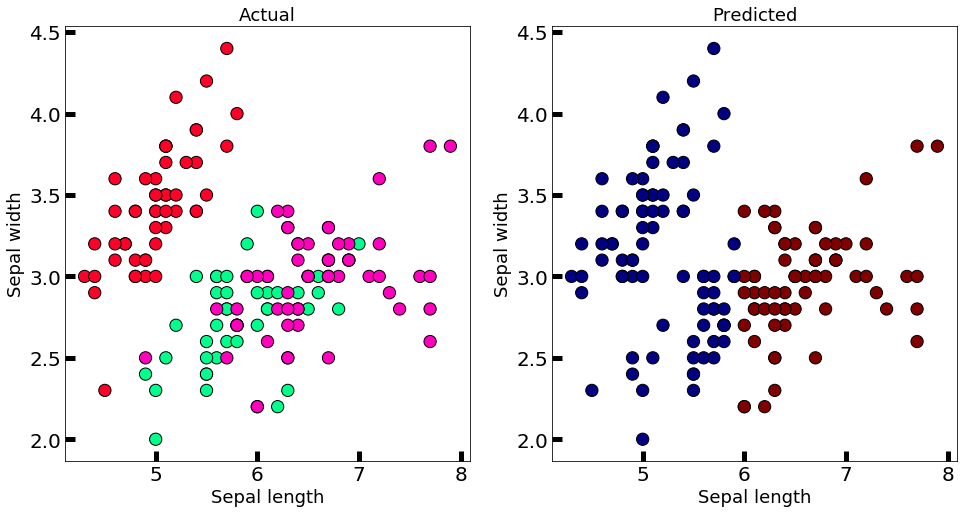

In [48]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

Finding best Parameters using Hyperparameter tuning and scaling the data

In [0]:
mms = MinMaxScaler()
mms.fit(iris.data)
data_transformed = mms.transform(iris.data)

In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

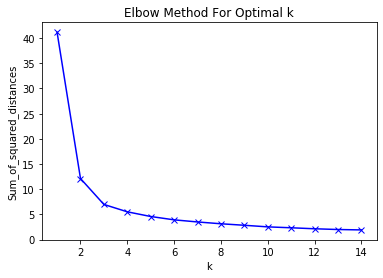

In [51]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Training the model with best value of K =3. We can see 3 and 4 are the best values of K where the Sum of squared distances are least.

In [52]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=17)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=17, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Predicted')

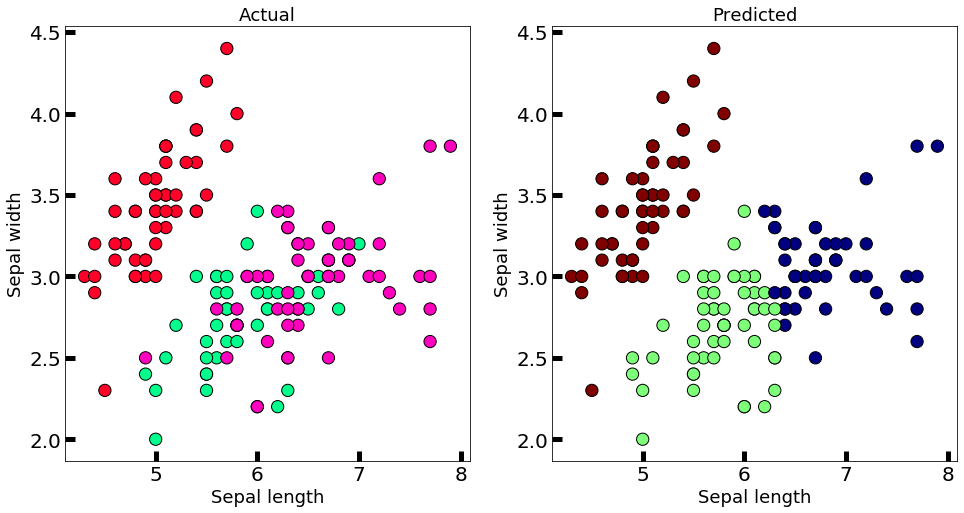

In [53]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

Conclusion: We can see the best K value is 3 and from above graph. the Kmean algorithm is creating almost accurate clsuters for the 3 species present in the dataset.